In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load the mathing data
full_matching_df = pd.read_csv("full_matching_data.csv")
full_matching_df.head()

,male_age,male_imprace,male_imprelig,male_date,male_go_out,male_sports,male_tvsports,male_exercise,male_dining,male_museums,...,female_career_journalism,female_career_architecture,female_goal_seemed like a fun night out,female_goal_to meet new people,female_goal_to get a date,female_goal_looking for a serious relationship,female_goal_to say i did it,female_goal_other,female_3_1sum,match
0,27.0,7.0,3.0,5.0,4.0,8.0,7.0,2.0,6.0,7.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,39.0,0.0
1,22.0,1.0,1.0,1.0,1.0,9.0,7.0,9.0,8.0,7.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,39.0,0.0
2,22.0,3.0,5.0,7.0,1.0,7.0,8.0,2.0,9.0,5.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,39.0,0.0
3,23.0,1.0,1.0,4.0,1.0,10.0,6.0,8.0,8.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,39.0,1.0
4,24.0,3.0,1.0,4.0,1.0,9.0,7.0,9.0,7.0,4.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,39.0,0.0


## full_matching_dataに対する分析
- full_mathching_dataはある男女のペアに対して、それぞれの年齢や普段外出をよくするかなどのそれぞれの個人情報、
及び彼らが同じ人種か否かなどの情報と共に、Matchすれば「1」しなければ「0」という結果が共に与えられる
- 多数のfeatureが与えられているため、まずニューラルネットに与える前に「必要な入力のみ」保持するようにする。
- 具体的にはmatchと相関係数の上位の項目を求める。

In [3]:
full_matching_df.columns

Index(['male_age', 'male_imprace', 'male_imprelig', 'male_date', 'male_go_out',
       'male_sports', 'male_tvsports', 'male_exercise', 'male_dining',
       'male_museums',
       ...
       'female_career_journalism', 'female_career_architecture',
       'female_goal_seemed like a fun night out',
       'female_goal_to meet new people', 'female_goal_to get a date',
       'female_goal_looking for a serious relationship',
       'female_goal_to say i did it', 'female_goal_other', 'female_3_1sum',
       'match'],
      dtype='object', length=175)

In [4]:
# データは全体で3991, また175の質的変数、量的変数が与えられている
print("Total data num : {0}, Total feature num : {1}".format(len(full_matching_df), len(full_matching_df.columns)))

Total data num : 3991, Total feature num : 175


In [5]:
# 3991ペアのうち、マッチしたのは640ペア
full_matching_df.match.value_counts()

0.0    3341
1.0     650
Name: match, dtype: int64

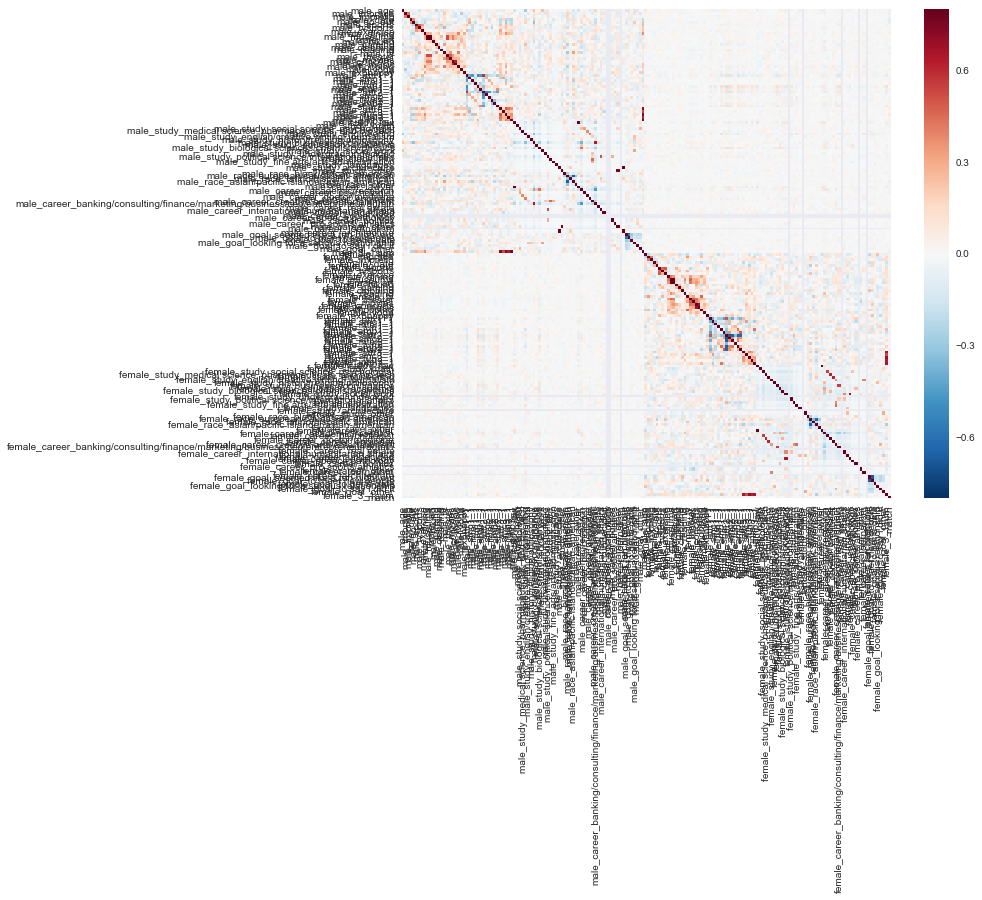

In [9]:
# Correlation matrixを求めてヒートマップで表示してみる
corrmat = full_matching_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

In [10]:
full_matching_df.corr().match.sort_values(ascending=False)[:10]

match                                                          1.000000
male_fun3_1                                                    0.086226
female_study_medical science, pharmaceuticals, and bio tech    0.079165
female_clubbing                                                0.066871
male_3_1sum                                                    0.065327
female_art                                                     0.063774
female_fun1_1                                                  0.056416
male_clubbing                                                  0.052261
female_concerts                                                0.051516
female_museums                                                 0.050616
Name: match, dtype: float64

In [6]:
full_matching_df.corr().match.sort_values(ascending=False)[-18:-8]

male_age                                          -0.041696
female_career_politics                            -0.044381
female_shar2_1                                    -0.045576
female_study_social work                          -0.053067
female_shar1_1                                    -0.053151
male_sinc1_1                                      -0.053930
male_imprace                                      -0.055087
male_race_asian/pacific islander/asian-american   -0.066520
male_go_out                                       -0.080585
male_date                                         -0.088799
Name: match, dtype: float64

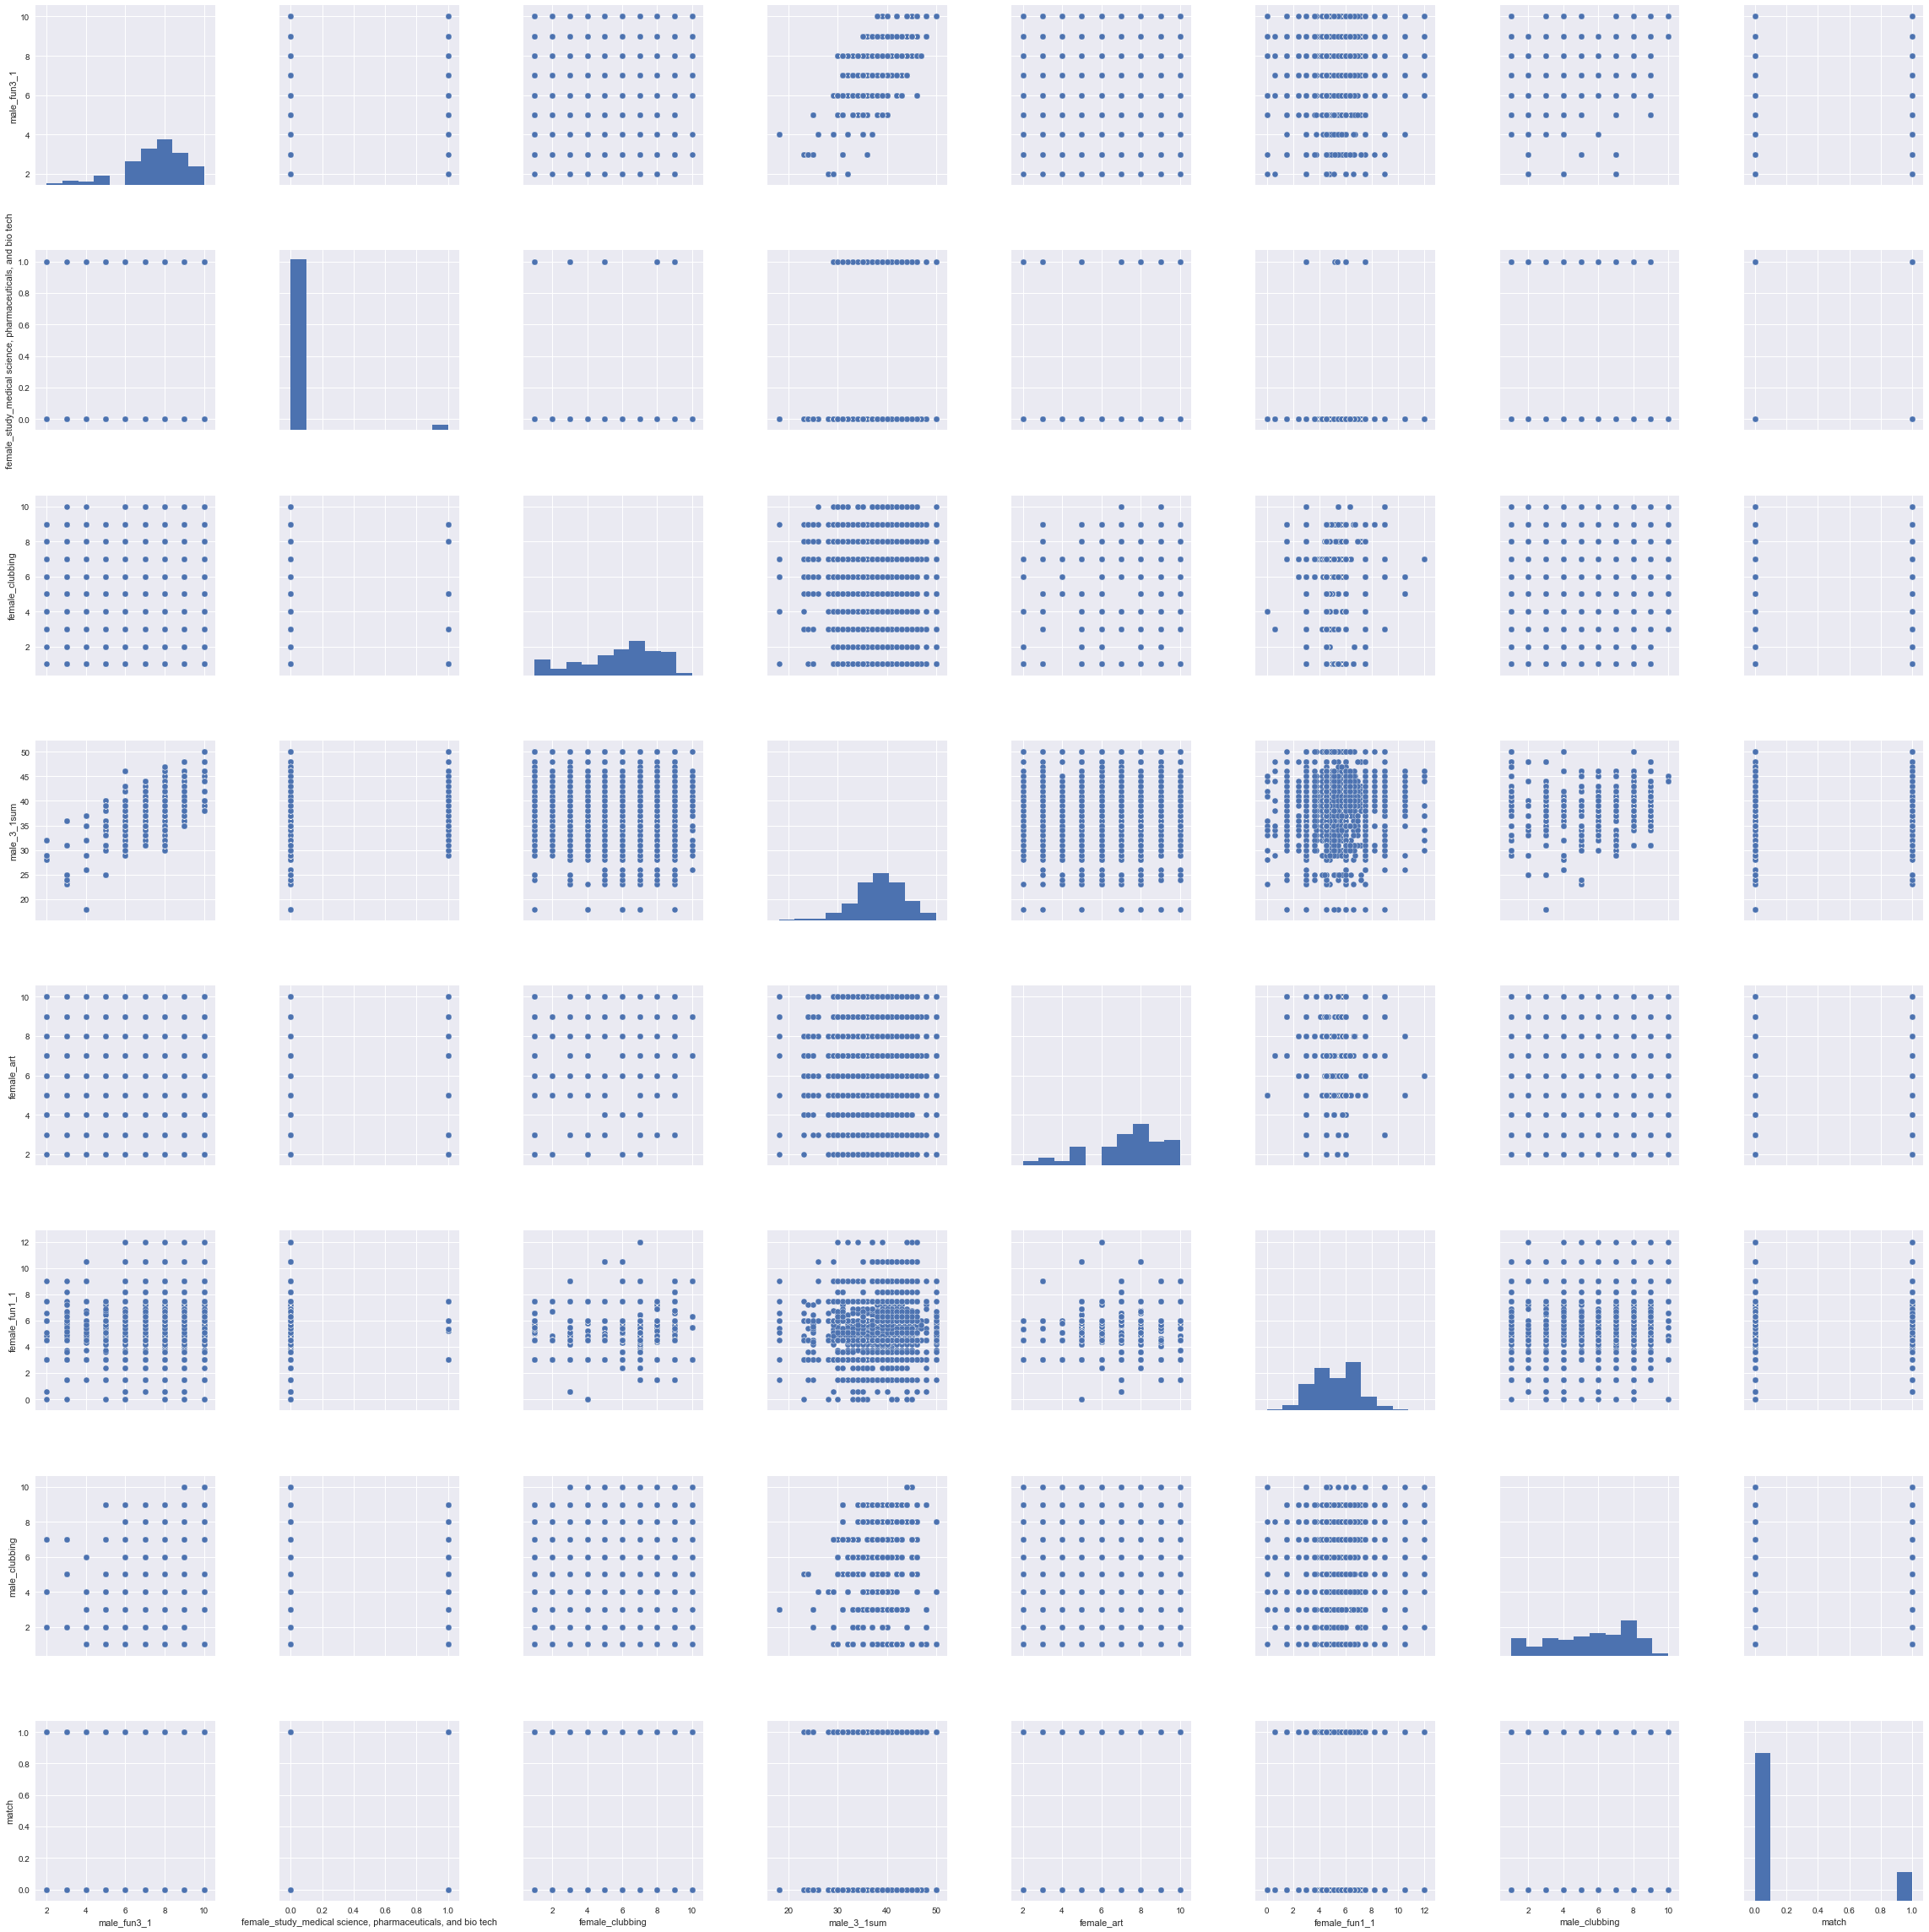

In [12]:
# matchと相関の高い項目について、相関をみる
sns.set()
cols = ['male_fun3_1', 'female_study_medical science, pharmaceuticals, and bio tech',\
        'female_clubbing', 'male_3_1sum', 'female_art', 'female_fun1_1', 'male_clubbing', 'match']
sns.pairplot(full_matching_df[cols], size = 4)
plt.show();

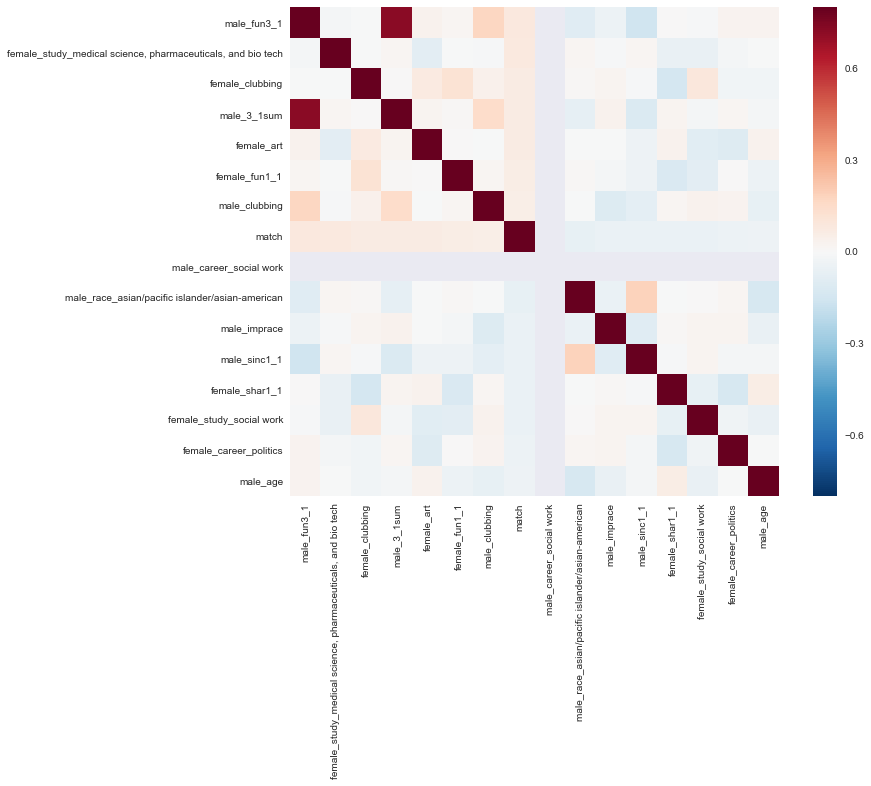

In [13]:
# matchと相関係数の高い項目、低い項目についてヒートマップを表示

cols.extend(["male_career_social work", "male_race_asian/pacific islander/asian-american", "male_imprace",\
            "male_sinc1_1", "female_shar1_1", "female_study_social work", "female_career_politics", "male_age"])
corrmat = full_matching_df[cols].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

### Feature Selectionなしに特徴量からマッチングの結果を予測する

In [5]:
import sklearn.model_selection

cols = list(set(full_matching_df.columns) - set(['match']))
train_x, test_x, train_y, test_y = sklearn.model_selection.train_test_split(full_matching_df[cols], full_matching_df.match, test_size=0.3)

In [6]:
test_y.value_counts()

0.0    991
1.0    207
Name: match, dtype: int64

In [19]:
### ロジスティック回帰による予測
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(train_x, train_y)
accuracy = clf.score(test_x, test_y)
print('accuracy {0:.2%}'.format(accuracy))

prediction = clf.predict(test_x)
from sklearn.metrics import classification_report
print(classification_report(test_y, prediction, target_names=["unmatched", "matched"]))

accuracy 83.47%
             precision    recall  f1-score   support

  unmatched       0.85      0.97      0.91      1010
    matched       0.38      0.09      0.14       188

avg / total       0.78      0.83      0.79      1198



In [20]:
## ランダムフォレストアンサンブルによる分類予測
import sklearn.ensemble

rf = sklearn.ensemble.RandomForestClassifier()
rf.fit(train_x, train_y)
accuracy = rf.score(test_x, test_y)
print('accuracy {0:.2%}'.format(accuracy))

accuracy 84.22%


In [21]:
prediction = rf.predict(test_x)
from sklearn.metrics import classification_report
print(classification_report(test_y, prediction, target_names=["unmatched", "matched"]))

[ 0.  0.  0. ...,  0.  0.  0.]
             precision    recall  f1-score   support

  unmatched       0.85      0.99      0.91      1010
    matched       0.48      0.06      0.11       188

avg / total       0.79      0.84      0.79      1198



### Feature Selectionを行なって予測する

In [23]:
# sckit-learnによるナイーブな分析
import sklearn.model_selection

cols = ['male_fun3_1', 'female_study_medical science, pharmaceuticals, and bio tech',\
        'female_clubbing', 'male_3_1sum', 'female_art', 'female_fun1_1', 'male_clubbing']

train_x, test_x, train_y, test_y = sklearn.model_selection.train_test_split(full_matching_df[cols], full_matching_df.match, test_size=0.3)

In [24]:
full_matching_df[cols].describe()

,male_fun3_1,"female_study_medical science, pharmaceuticals, and bio tech",female_clubbing,male_3_1sum,female_art,female_fun1_1,male_clubbing
count,3991.000000,3991.000000,3991.000000,3991.000000,3991.000000,3991.000000,3991.000000
mean,7.506389,0.028564,5.876723,38.623653,7.243548,5.138216,5.577800
std,1.691019,0.166599,2.447204,5.117828,2.029313,1.656001,2.537913
min,2.000000,0.000000,1.000000,18.000000,2.000000,0.000000,1.000000
25%,7.000000,0.000000,4.000000,35.000000,6.000000,4.500000,4.000000
50%,8.000000,0.000000,6.000000,39.000000,8.000000,5.217000,6.000000
75%,9.000000,0.000000,8.000000,42.000000,9.000000,6.000000,8.000000
max,10.000000,1.000000,10.000000,50.000000,10.000000,12.000000,10.000000


In [25]:
test_y.value_counts()

0.0    989
1.0    209
Name: match, dtype: int64

In [26]:
import sklearn.ensemble

rf = sklearn.ensemble.RandomForestClassifier()
rf.fit(train_x, train_y)
accuracy = rf.score(test_x, test_y)
print('accuracy {0:.2%}'.format(accuracy))

accuracy 80.22%


In [27]:
prediction = rf.predict(test_x)
print(prediction)
from sklearn.metrics import classification_report
print(classification_report(test_y, prediction, target_names=["matched", "unmatched"]))

[ 0.  0.  0. ...,  0.  0.  0.]
             precision    recall  f1-score   support

    matched       0.83      0.96      0.89       989
  unmatched       0.27      0.08      0.12       209

avg / total       0.73      0.80      0.75      1198



### 結果
- 選択した7つの特徴量を使って100%の予測を行うことができた。
- ２分類問題なので簡単だったのではないか

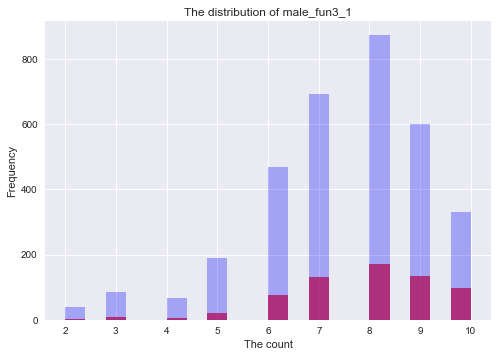

In [150]:
## 一番相関の大きい変数についてヒストグラムで可視化
matched = full_matching_df.loc[full_matching_df.match == 1.0, "male_fun3_1"]
un_matched = full_matching_df.loc[full_matching_df.match == 0.0, "male_fun3_1"]
plt.figure()
plt.hist(matched , bins= 20, alpha=0.7, histtype='stepfilled', color='r')
plt.hist(un_matched , bins= 20, alpha=0.3,histtype='stepfilled', color='b')
plt.title("The distribution of male_fun3_1")
plt.xlabel("The count")
plt.ylabel("Frequency")
plt.show()

## user_dataに対する分析

In [27]:
user_df = pd.read_csv("user_data.csv")
user_df.head()

,Unnamed: 0,iid,id,gender,idg,match,age,imprace,imprelig,date,...,career_other,career_journalism,career_architecture,goal_seemed like a fun night out,goal_to meet new people,goal_to get a date,goal_looking for a serious relationship,goal_to say i did it,goal_other,3_1sum
0,0,4,4.0,0.0,7.0,0.2,23.0,1.0,1.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,39.0
1,1,5,5.0,0.0,9.0,0.2,21.0,8.0,1.0,4.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,33.0
2,2,6,6.0,0.0,11.0,0.2,23.0,1.0,1.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,34.0
3,3,7,7.0,0.0,13.0,0.2,22.0,2.0,4.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,31.0
4,4,8,8.0,0.0,15.0,0.8,25.0,1.0,1.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,35.0


In [151]:
print("Total data num : {0}, Total feature num : {1}".format(len(user_df), len(user_df.columns)))

Total data num : 535, Total feature num : 93


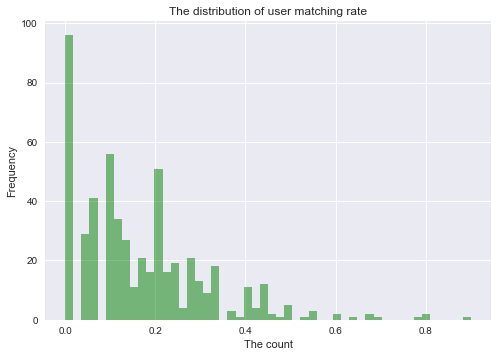

In [164]:
plt.figure()
plt.hist(user_df.match, bins= 50, alpha=0.5, histtype='stepfilled', color='g')
plt.title("The distribution of user matching rate")
plt.xlabel("The count")
plt.ylabel("Frequency")
plt.show()

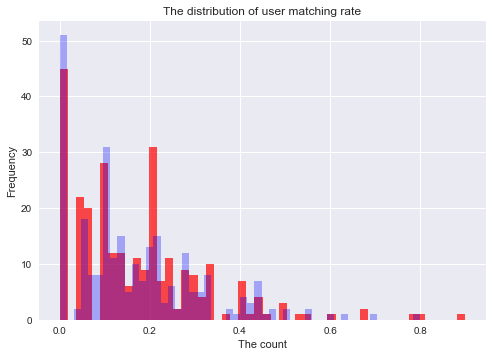

In [166]:
female = user_df.loc[user_df.gender == 1.0, "match"]
male = user_df.loc[user_df.gender == 0.0, "match"]
plt.figure()
plt.hist(female, bins= 50, alpha=0.7, histtype='stepfilled', color='r')
plt.hist(male, bins= 50, alpha=0.3,histtype='stepfilled', color='b')
plt.title("The distribution of user matching rate")
plt.xlabel("The count")
plt.ylabel("Frequency")
plt.show()

In [171]:
print("The average matching rate of female is {0}, male is {1}".format(female.mean(), male.mean()))

The average matching rate of female is 0.16875886867905057, male is 0.16699863713321791


0.16875886867905057

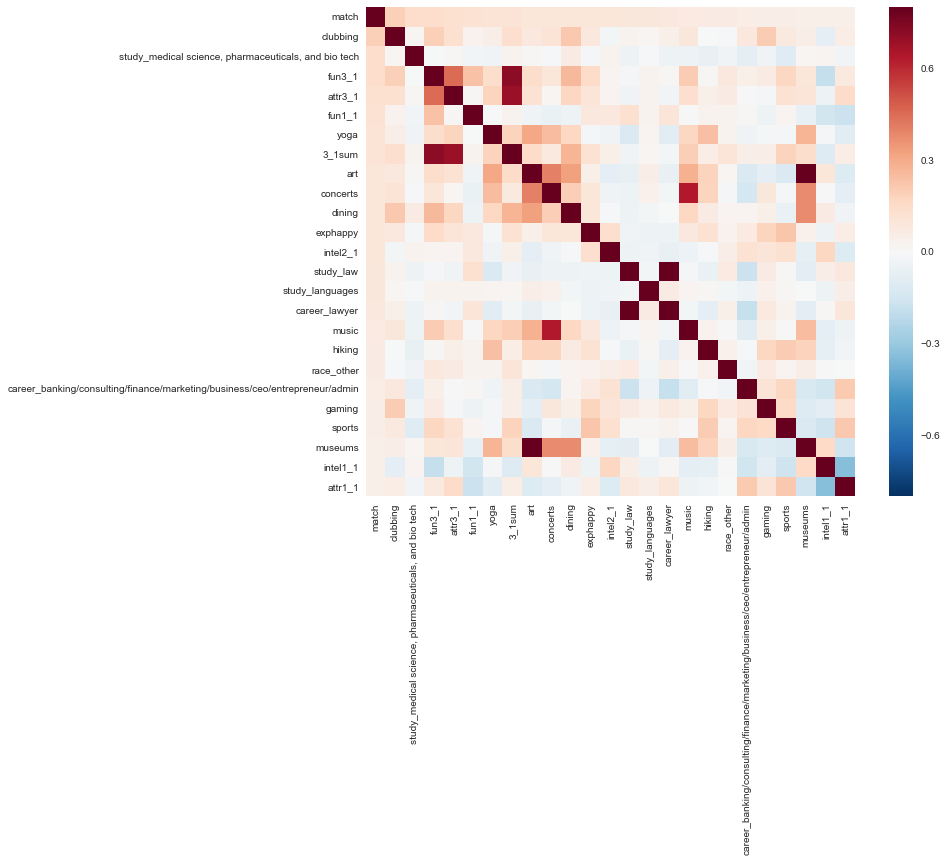

In [181]:
# Show heatmap for user matching
selection = user_df[user_df.corr().match.sort_values(ascending=False)[:25].keys()]
corrmat = selection.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

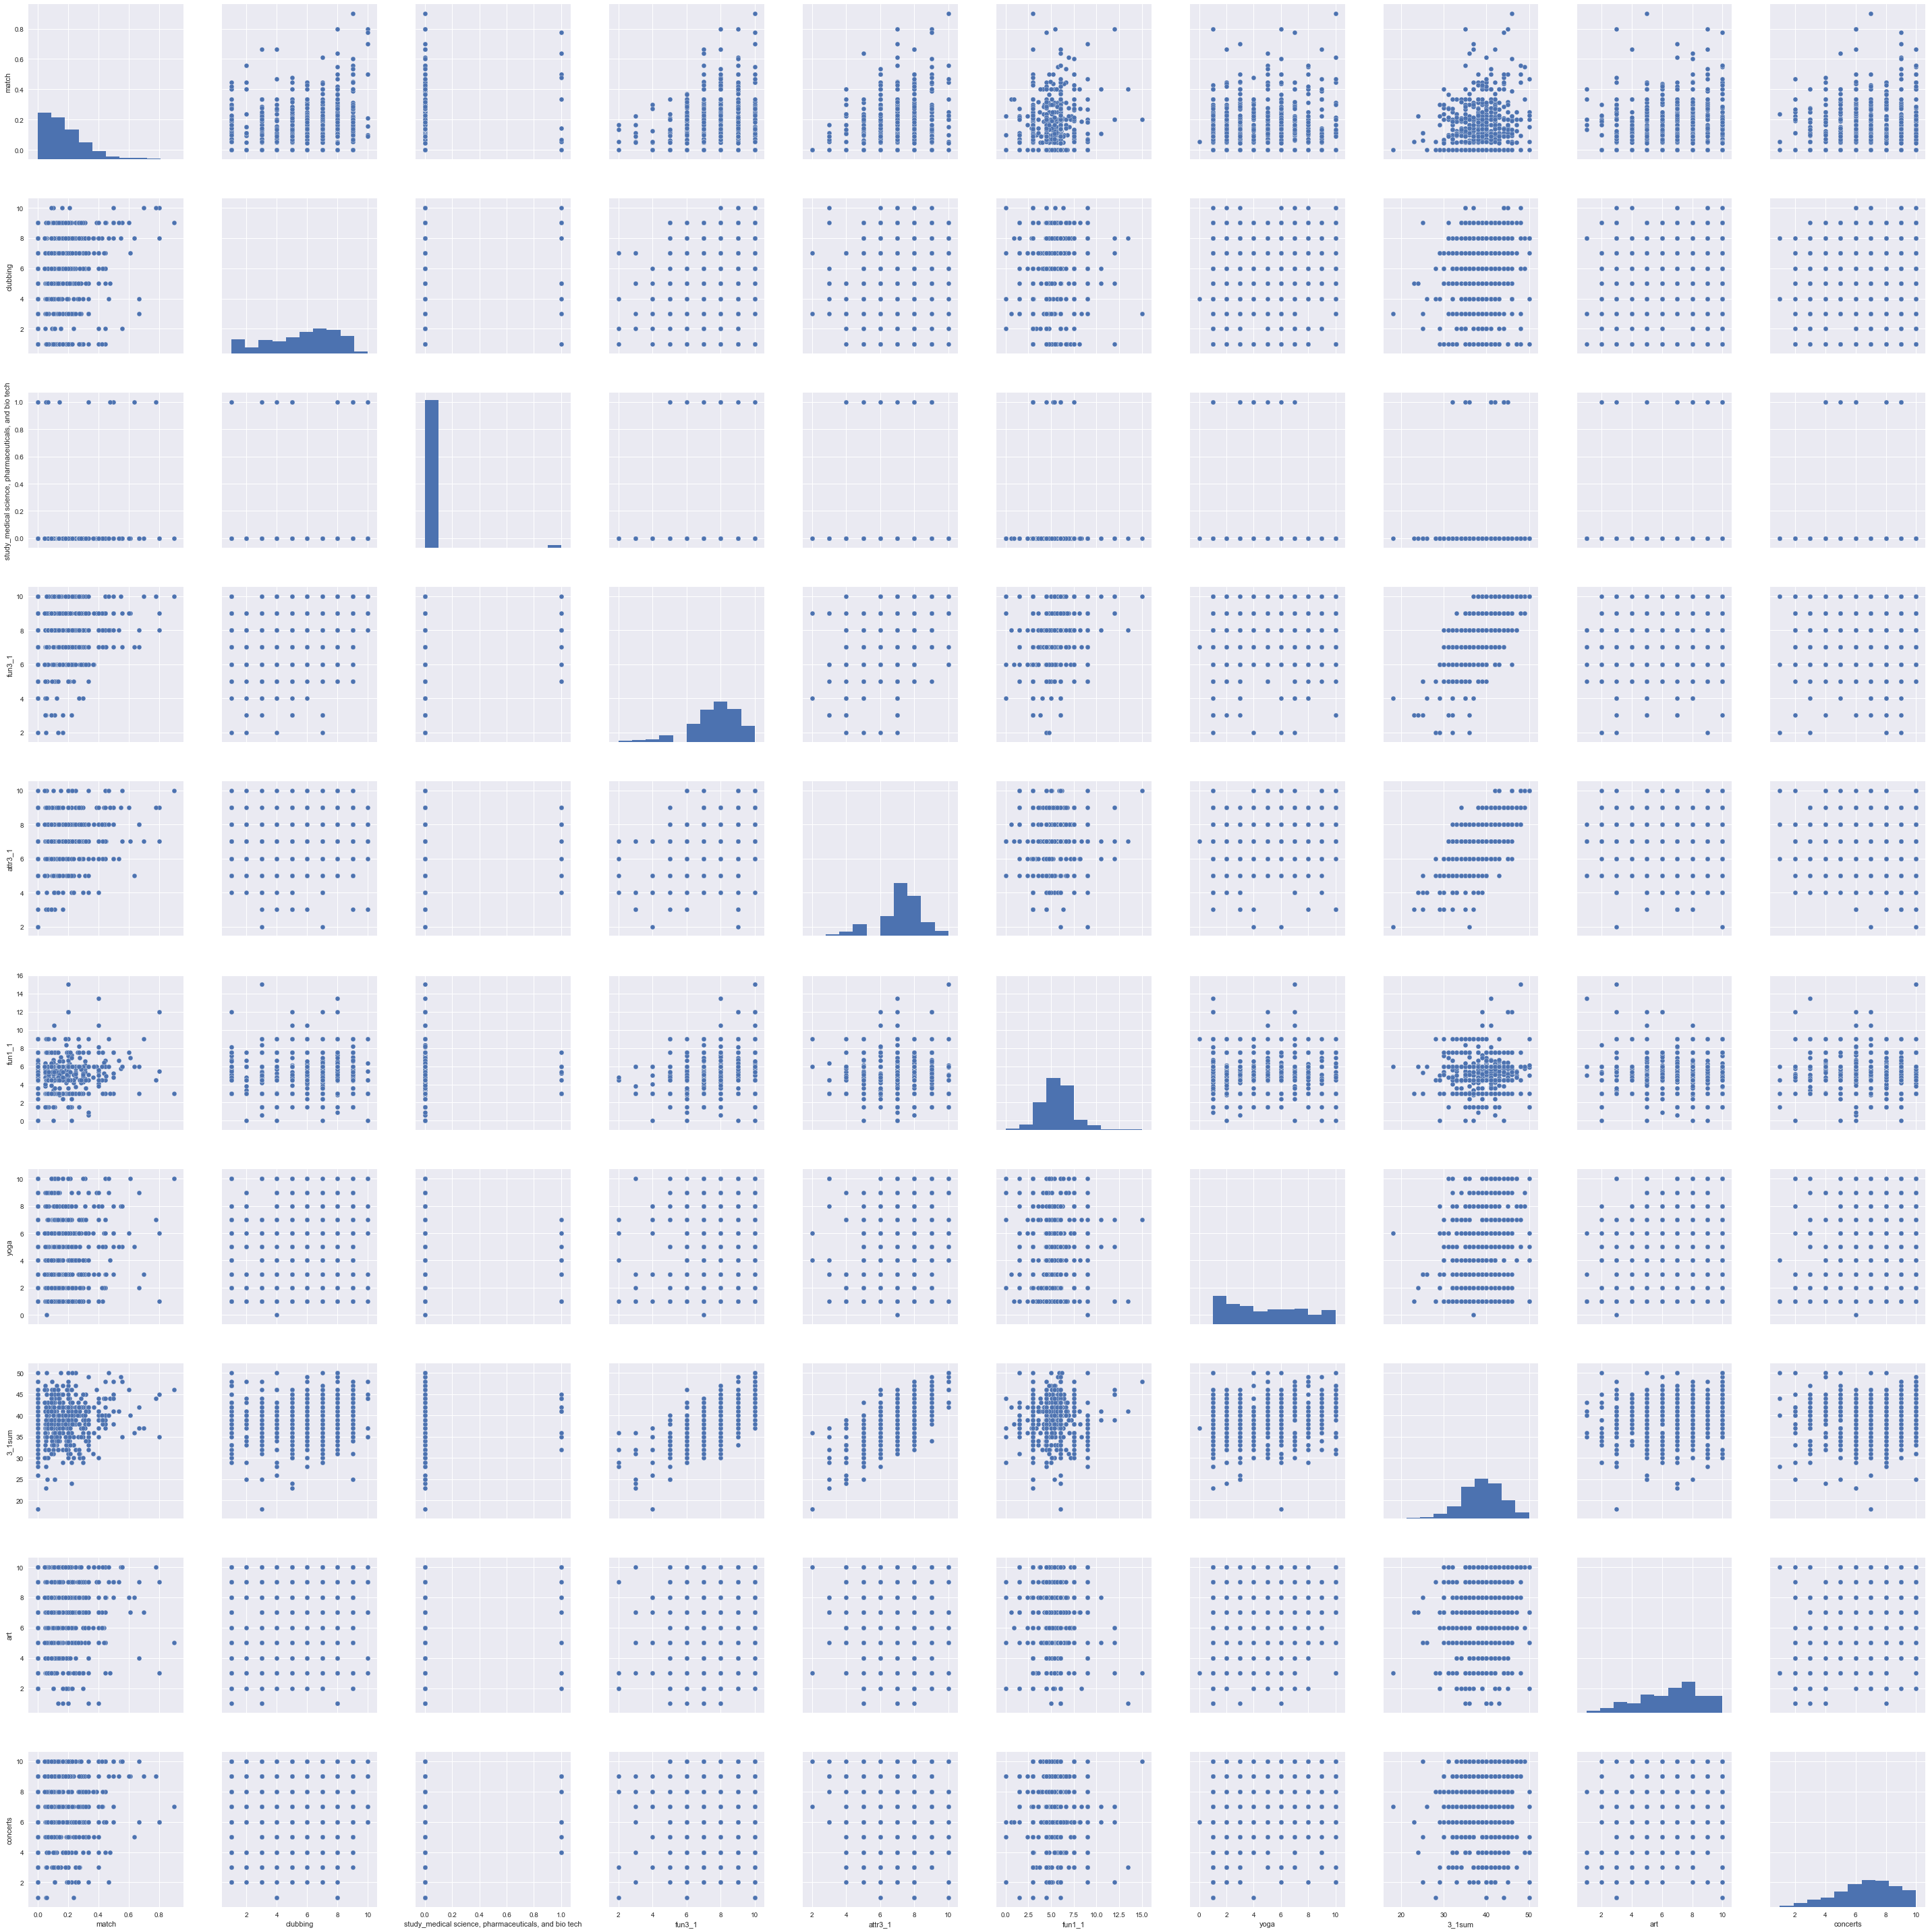

In [184]:
sns.set()
cols = user_df.corr().match.sort_values(ascending=False)[:10].keys()
sns.pairplot(user_df[cols], size = 4)
plt.show()

### 特徴選択を行なしに回帰分析

In [8]:
cols = list(set(full_matching_df.columns) - set(['match']))
train_x, test_x, train_y, test_y = sklearn.model_selection.train_test_split(full_matching_df[cols], full_matching_df.match, test_size=0.3)

In [9]:
# 線形回帰
from sklearn.linear_model import LinearRegression

mod = LinearRegression(fit_intercept = True, normalize = False, copy_X = True, n_jobs = 1)
# fit関数でパラメータ推定
mod.fit(train_x, train_y)

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
print(mod.coef_)

[ -8.20993770e+11   1.15110095e-03   2.69140802e+10   1.58255219e+11
  -1.16058725e+10   3.20371299e+10   2.69140802e+10   9.48599112e+11
   5.20474648e+11  -8.28889597e+09  -1.70029634e-03   5.20474648e+11
   3.41586377e-03  -3.04250111e+10   4.01181417e-03   2.71893543e+10
   1.00648656e+11   1.58255219e+11  -1.16058725e+10   2.69140802e+10
   6.34320856e-03  -1.16058725e+10  -2.25002822e+11  -1.39884453e+11
   7.08290688e+09   2.69140802e+10  -1.16058725e+10   6.85992549e-05
   2.69140802e+10   9.48599112e+11   2.71893543e+10  -1.39884453e+11
  -8.28889597e+09  -1.54189855e-03  -1.48692912e-02   1.16813620e+11
  -8.20993770e+11   2.69140802e+10   7.08290688e+09  -1.16058725e+10
  -8.20993770e+11   7.08290688e+09  -8.20993770e+11   1.00648656e+11
  -1.04441827e+11  -2.68393173e-03  -8.28889597e+09  -6.14453237e-03
  -1.58255219e+11  -5.00368582e-04  -5.35927188e-03  -1.86176158e-03
   8.98991120e-03   2.71893543e+10   1.58255219e+11   2.69140802e+10
   2.69140802e+10   7.84969515e-03

In [11]:
# 作成したモデルから予測（学習用、検証用モデル使用）
y_train_pred = mod.predict(train_x)
y_test_pred = mod.predict(test_x)

In [12]:
print(test_y)

416     0.0
234     0.0
2743    0.0
1828    0.0
2128    0.0
1084    0.0
32      0.0
2038    0.0
1434    0.0
2742    0.0
2820    0.0
1558    0.0
2740    0.0
2452    0.0
811     0.0
1475    1.0
730     0.0
51      1.0
2897    0.0
2797    1.0
674     0.0
1320    0.0
3245    0.0
1346    0.0
1207    0.0
92      0.0
787     0.0
2029    1.0
822     0.0
238     0.0
       ... 
2001    0.0
3806    1.0
2739    0.0
3609    0.0
429     0.0
2403    0.0
1871    0.0
947     0.0
3326    0.0
1321    0.0
1699    0.0
1979    0.0
1303    0.0
3135    0.0
173     0.0
2414    0.0
2544    0.0
1116    0.0
2089    0.0
354     0.0
2023    0.0
108     0.0
2218    0.0
2713    0.0
3674    0.0
1166    0.0
378     0.0
1682    0.0
452     0.0
619     0.0
Name: match, dtype: float64


In [16]:
print(y_test_pred - test_y)

416     0.195312
234     0.187500
2743    0.203125
1828    0.039062
2128   -0.062500
1084    0.132812
32      0.468750
2038    0.015625
1434    0.375000
2742    0.148438
2820    0.257812
1558    0.390625
2740    0.109375
2452    0.023438
811     0.125000
1475   -0.585938
730     0.101562
51     -0.539062
2897    0.242188
2797   -0.742188
674     0.101562
1320    0.101562
3245    0.117188
1346    0.226562
1207    0.132812
92      0.062500
787     0.195312
2029   -0.601562
822     0.031250
238     0.250000
          ...   
2001   -0.070312
3806   -0.867188
2739    0.070312
3609    0.078125
429     0.164062
2403    0.273438
1871    0.335938
947     0.265625
3326    0.453125
1321    0.242188
1699    0.085938
1979    0.171875
1303    0.281250
3135    0.273438
173     0.445312
2414    0.265625
2544    0.203125
1116    0.257812
2089    0.117188
354     0.062500
2023    0.257812
108     0.421875
2218    0.242188
2713    0.226562
3674    0.039062
1166    0.625000
378     0.296875
1682    0.4218

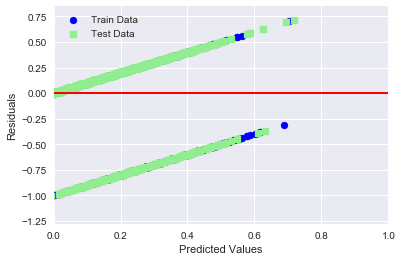

In [17]:
%matplotlib inline
# 学習用、検証用それぞれで残差をプロット
plt.scatter(y_train_pred, y_train_pred - train_y, c = 'blue', marker = 'o', label = 'Train Data')
plt.scatter(y_test_pred, y_test_pred - test_y, c = 'lightgreen', marker = 's', label = 'Test Data')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
# 凡例を左上に表示
plt.legend(loc = 'upper left')
# y = 0に直線を引く
plt.hlines(y = 0, xmin = -1, xmax = 1, lw = 2, color = 'red')
plt.xlim([0, 1])
plt.show()